<a href="https://colab.research.google.com/github/KevinBezerra/Resume/blob/main/Projeto_de_An%C3%A1lise_de_Im%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação

In [1]:
!pip install sidetable
!pip install pandas-profiling==3.3.0
!pip install geopy
!pip install pyzipcode
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.0/268.0 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 5.5 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyzipcode: filename=pyzipcode-3.0.1-py3-none-any.whl size=1932175 sha256=f8a6577483a16162c3bb61f2adfb196af8566776ca9ac95f7ba74094e25fb7d4
  Stored in directory: /root/.cache/pip/wheels/c8/68/c3/537050586cf6f259376d99370b519925524d59c8652c5aedad
Successfully built pyzipcode
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd 

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform
from geopy.geocoders import Nominatim

from pyzipcode import ZipCodeDatabase

import matplotlib.pyplot as plt
import plotly_express as px

import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Início das Análises

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Conseguindo os nomes das cidades
def get_city(x):
  try:
    zcdb = ZipCodeDatabase()
    zipcode = zcdb[x]
    return zipcode.city
  except:
    return 'Not Found'

df['city'] = df['zipcode'].apply(get_city)

In [6]:
# Área livre para construção - Indicativo de expansão
df['sqft_free'] = df['sqft_lot'] - df['sqft_living']
df['price_ft2_living'] = df['price']/df['sqft_living']
df['price_ft2'] = df['price']/df['sqft_lot']
df.sample(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,sqft_free,price_ft2_living,price_ft2
3901,6072300110,20150416T000000,550000.0,3,1.75,1940,8376,1.0,0,0,...,0,98006,47.5586,-122.173,2400,8674,Bellevue,6436,283.505155,65.663801


In [7]:
# Ordenando os dados para conseguir calcular lucro

df_sorted = df.sort_values(['id','date'])
df_sorted

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,sqft_free,price_ft2_living,price_ft2
2496,1000102,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,...,0,98002,47.3262,-122.214,2060,7316,Auburn,6973,116.666667,29.873040
2497,1000102,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,0,98002,47.3262,-122.214,2060,7316,Auburn,6973,125.000000,32.006828
6735,1200019,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,...,0,98166,47.4444,-122.351,2590,21891,Seattle,23976,314.320388,24.869412
8411,1200021,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,...,0,98166,47.4434,-122.347,2250,20023,Seattle,41540,273.972603,9.302326
8809,2800031,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,...,0,98168,47.4783,-122.265,1290,10320,Seattle,6169,164.335664,30.925122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16737,9842300095,20140725T000000,365000.0,5,2.00,1600,4168,1.5,0,0,...,0,98126,47.5297,-122.381,1190,4168,Seattle,2568,228.125000,87.571977
3260,9842300485,20150311T000000,380000.0,2,1.00,1040,7372,1.0,0,0,...,0,98126,47.5285,-122.378,1930,5150,Seattle,6332,365.384615,51.546392
7621,9842300540,20140624T000000,339000.0,3,1.00,1100,4128,1.0,0,0,...,0,98126,47.5296,-122.379,1510,4538,Seattle,3028,308.181818,82.122093
20979,9895000040,20140703T000000,399900.0,2,1.75,1410,1005,1.5,0,0,...,0,98027,47.5446,-122.018,1440,1188,Issaquah,-405,283.617021,397.910448


In [8]:
# Calculando lucro

profit = df_sorted.groupby(['id']).price.diff()

In [9]:
profit

2496         NaN
2497     20000.0
6735         NaN
8411         NaN
8809         NaN
          ...   
16737        NaN
3260         NaN
7621         NaN
20979        NaN
15951        NaN
Name: price, Length: 21613, dtype: float64

In [10]:
# Juntando a tabela de lucros com a tabela com o restante dos dados e dropando os valores nulos para ter uma tabela somente de lucros

df_profit = pd.merge(df_sorted, profit, left_index=True, right_index=True).dropna()
df_profit

,id,date,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,city,sqft_free,price_ft2_living,price_ft2,price_y
2497,1000102,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,98002,47.3262,-122.214,2060,7316,Auburn,6973,125.000000,32.006828,20000.0
16815,7200179,20150424T000000,175000.0,2,1.00,840,12750,1.0,0,0,...,98055,47.4840,-122.211,1480,6969,Renton,11910,208.333333,13.725490,25000.0
11434,109200390,20141020T000000,250000.0,3,1.75,1480,3900,1.0,0,0,...,98023,47.2977,-122.367,1830,6956,Federal Way,2420,168.918919,64.102564,5000.0
12418,123039336,20141208T000000,244900.0,1,1.00,620,8261,1.0,0,0,...,98106,47.5138,-122.364,1180,8244,Seattle,7641,395.000000,29.645321,96900.0
7793,251300110,20150114T000000,358000.0,3,2.25,2510,12013,2.0,0,0,...,98003,47.3473,-122.314,1870,8017,Federal Way,9503,142.629482,29.801049,133000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,9407110710,20150226T000000,322000.0,3,1.75,1510,8400,1.0,0,0,...,98045,47.4476,-121.771,1500,10125,North Bend,6890,213.245033,38.333333,127000.0
4923,9809000020,20150313T000000,1940000.0,5,2.25,3120,16672,2.0,0,0,...,98004,47.6458,-122.219,3740,17853,Bellevue,13552,621.794872,116.362764,45000.0
6346,9828200460,20150106T000000,430000.0,2,1.00,700,4800,1.0,0,0,...,98122,47.6147,-122.300,1440,4800,Seattle,4100,614.285714,89.583333,170000.0
15200,9834200305,20150210T000000,615000.0,3,1.00,1790,3876,1.5,0,0,...,98144,47.5750,-122.288,1360,4080,Seattle,2086,343.575419,158.668731,265000.0


In [11]:
df_profit.sort_values(['price_y'], ascending=False)

,id,date,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,city,sqft_free,price_ft2_living,price_ft2,price_y
19336,6021500970,20150407T000000,874950.0,2,1.00,1080,4000,1.0,0,0,...,98117,47.6902,-122.387,1530,4240,Seattle,2920,810.138889,218.737500,529950.0
8916,7977201065,20150305T000000,740000.0,3,1.75,1380,4590,1.0,0,0,...,98115,47.6841,-122.293,1320,4692,Seattle,3210,536.231884,161.220044,390000.0
3299,7409700215,20150313T000000,921500.0,3,1.50,1900,5000,1.5,0,0,...,98115,47.6779,-122.294,2090,5000,Seattle,3100,485.000000,184.300000,371500.0
9280,4443800385,20150506T000000,778100.0,2,1.00,1480,4080,1.0,0,0,...,98117,47.6842,-122.393,1310,4080,Seattle,2600,525.743243,190.710784,368100.0
9721,2568300045,20150319T000000,649950.0,6,2.00,1900,8240,1.0,0,0,...,98125,47.7037,-122.296,1900,8240,Seattle,6340,342.078947,78.877427,344950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,8682262400,20150513T000000,419950.0,2,1.75,1350,4003,1.0,0,0,...,98053,47.7176,-122.033,1350,4479,Redmond,2653,311.074074,104.908818,-10050.0
10611,2767603612,20150113T000000,489000.0,2,2.25,1290,1334,3.0,0,0,...,98107,47.6719,-122.382,1350,1334,Seattle,44,379.069767,366.566717,-11000.0
7846,4139420590,20140827T000000,1200000.0,4,3.50,4560,16643,1.0,0,3,...,98006,47.5521,-122.115,4060,15177,Bellevue,12083,263.157895,72.102385,-12500.0
5593,2726049071,20150408T000000,489950.0,2,1.00,820,4206,1.0,0,0,...,98125,47.7076,-122.284,1810,7200,Seattle,3386,597.500000,116.488350,-20050.0


# Data preparation

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ImportError: ignored

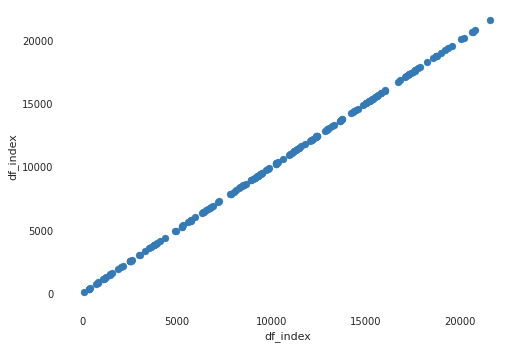

In [12]:
# Rodando um relatório para verificar correlação e quaisquer outras limpezas necessárias.

df_profit.profile_report()

In [13]:
# Dropando colunas desnecessárias (correlação baixa)

profit_clean = df_profit.drop(
    columns=['lat',
             'long',
             'bathrooms',
             'view',
             'floors',
             'grade',
             'waterfront',
             'sqft_above',
             'sqft_living15',
             'sqft_lot15',
             'sqft_free',
             'zipcode',
             'yr_renovated',
             'yr_built']
    )

In [14]:
profit_clean

,id,date,price_x,bedrooms,sqft_living,sqft_lot,condition,sqft_basement,city,price_ft2_living,price_ft2,price_y
2497,1000102,20150422T000000,300000.0,6,2400,9373,3,0,Auburn,125.000000,32.006828,20000.0
16815,7200179,20150424T000000,175000.0,2,840,12750,3,0,Renton,208.333333,13.725490,25000.0
11434,109200390,20141020T000000,250000.0,3,1480,3900,4,0,Federal Way,168.918919,64.102564,5000.0
12418,123039336,20141208T000000,244900.0,1,620,8261,3,0,Seattle,395.000000,29.645321,96900.0
7793,251300110,20150114T000000,358000.0,3,2510,12013,3,0,Federal Way,142.629482,29.801049,133000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,9407110710,20150226T000000,322000.0,3,1510,8400,2,530,North Bend,213.245033,38.333333,127000.0
4923,9809000020,20150313T000000,1940000.0,5,3120,16672,4,0,Bellevue,621.794872,116.362764,45000.0
6346,9828200460,20150106T000000,430000.0,2,700,4800,3,0,Seattle,614.285714,89.583333,170000.0
15200,9834200305,20150210T000000,615000.0,3,1790,3876,5,700,Seattle,343.575419,158.668731,265000.0


In [15]:
# Dividindo os imóveis entre os mais lucrativos e os menos lucrativos

top_imoveis = profit_clean.sort_values(['price_y'], ascending=False).head(88)
pior_imoveis = profit_clean.sort_values(['price_y']).head(88)

In [16]:
# renomenado colunas para facilitar análise

profit_clean = profit_clean.rename({'price_x': 'sale_price', 'price_y': 'past_profit'}, axis=1) 
profit_clean

,id,date,sale_price,bedrooms,sqft_living,sqft_lot,condition,sqft_basement,city,price_ft2_living,price_ft2,past_profit
2497,1000102,20150422T000000,300000.0,6,2400,9373,3,0,Auburn,125.000000,32.006828,20000.0
16815,7200179,20150424T000000,175000.0,2,840,12750,3,0,Renton,208.333333,13.725490,25000.0
11434,109200390,20141020T000000,250000.0,3,1480,3900,4,0,Federal Way,168.918919,64.102564,5000.0
12418,123039336,20141208T000000,244900.0,1,620,8261,3,0,Seattle,395.000000,29.645321,96900.0
7793,251300110,20150114T000000,358000.0,3,2510,12013,3,0,Federal Way,142.629482,29.801049,133000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,9407110710,20150226T000000,322000.0,3,1510,8400,2,530,North Bend,213.245033,38.333333,127000.0
4923,9809000020,20150313T000000,1940000.0,5,3120,16672,4,0,Bellevue,621.794872,116.362764,45000.0
6346,9828200460,20150106T000000,430000.0,2,700,4800,3,0,Seattle,614.285714,89.583333,170000.0
15200,9834200305,20150210T000000,615000.0,3,1790,3876,5,700,Seattle,343.575419,158.668731,265000.0


# Respondendo as perguntas do negócio

Quais foram as 10 vendas de imóveis mais lucrativas?

In [18]:
top10 = profit_clean.sort_values(['past_profit'], ascending=False).head(10)
top10

,id,date,sale_price,bedrooms,sqft_living,sqft_lot,condition,sqft_basement,city,price_ft2_living,price_ft2,past_profit
19336,6021500970,20150407T000000,874950.0,2,1080,4000,3,0,Seattle,810.138889,218.737500,529950.0
8916,7977201065,20150305T000000,740000.0,3,1380,4590,2,450,Seattle,536.231884,161.220044,390000.0
3299,7409700215,20150313T000000,921500.0,3,1900,5000,3,260,Seattle,485.000000,184.300000,371500.0
9280,4443800385,20150506T000000,778100.0,2,1480,4080,3,430,Seattle,525.743243,190.710784,368100.0
9721,2568300045,20150319T000000,649950.0,6,1900,8240,2,700,Seattle,342.078947,78.877427,344950.0
13629,2023049218,20150316T000000,445000.0,2,930,7740,1,0,Seattle,478.494624,57.493540,339500.0
9115,1568100300,20150121T000000,682500.0,6,3500,8504,3,0,Seattle,195.000000,80.256350,332500.0
18704,3558900590,20150324T000000,692500.0,6,2230,10080,3,840,Kirkland,310.538117,68.700397,332500.0
11062,6141100320,20150213T000000,570000.0,2,1500,6685,3,310,Seattle,380.000000,85.265520,325000.0
14367,3333002450,20150122T000000,490000.0,1,850,8050,2,0,Seattle,576.470588,60.869565,325000.0


Quais foram as 10 vendas que mais deram prejuízo?

In [19]:
piores10 = profit_clean.sort_values(['past_profit']).head(10)
piores10

,id,date,sale_price,bedrooms,sqft_living,sqft_lot,condition,sqft_basement,city,price_ft2_living,price_ft2,past_profit
13299,7167000040,20150305T000000,700000.0,4,3350,199253,3,0,Black Diamond,208.955224,3.513122,-40000.0
5593,2726049071,20150408T000000,489950.0,2,820,4206,3,0,Seattle,597.500000,116.488350,-20050.0
7846,4139420590,20140827T000000,1200000.0,4,4560,16643,3,2330,Bellevue,263.157895,72.102385,-12500.0
10611,2767603612,20150113T000000,489000.0,2,1290,1334,3,0,Seattle,379.069767,366.566717,-11000.0
837,8682262400,20150513T000000,419950.0,2,1350,4003,3,0,Redmond,311.074074,104.908818,-10050.0
15278,2619920170,20141219T000000,765000.0,4,3230,4290,3,0,Kirkland,236.842105,178.321678,-7500.0
20054,8648900110,20140826T000000,555000.0,3,1940,3211,3,0,Issaquah,286.082474,172.843351,0.0
14983,6308000010,20150423T000000,585000.0,3,2290,5089,3,0,Bellevue,255.458515,114.953822,0.0
3951,1825069031,20141016T000000,550000.0,4,2410,8447,4,350,Sammamish,228.215768,65.111874,0.0
11434,109200390,20141020T000000,250000.0,3,1480,3900,4,0,Federal Way,168.918919,64.102564,5000.0


Qual a cidade mais lucrativa para vendas de imóveis?

In [20]:
top_city = top10['city'].mode()
top_city

0    Seattle
Name: city, dtype: object

Qual a cidade que mais deu prejuízo?

In [21]:
piores10['city'].mode()

0    Bellevue
1     Seattle
Name: city, dtype: object

Quanto é a média de preço do metro quadrado nas cidade mais lucrativa e na menos lucrativa?

In [22]:
seattle = profit_clean[profit_clean['city'].str.contains('Seattle')]
seattle['price_ft2'].mean()

88.49739896556797

In [23]:
bellevue = profit_clean[profit_clean['city'].str.contains('Bellevue')]
bellevue['price_ft2'].mean()

96.44559311076343